In [ ]:
!pip install pandas
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
csv_file_path = 'DataCoSupplyChainDataset.csv'

csv_file_path = 'DataCoSupplyChainDataset.csv'
df = pd.read_csv(csv_file_path, encoding='ISO-8859-1')

In [ ]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [ ]:
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['Type', 'Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)',
       'Benefit_per_order', 'Sales_per_customer', 'Delivery_Status',
       'Late_delivery_risk', 'Category_Id', 'Category_Name', 'Customer_City',
       'Customer_Country', 'Customer_Email', 'Customer_Fname', 'Customer_Id',
       'Customer_Lname', 'Customer_Password', 'Customer_Segment',
       'Customer_State', 'Customer_Street', 'Customer_Zipcode',
       'Department_Id', 'Department_Name', 'Latitude', 'Longitude', 'Market',
       'Order_City', 'Order_Country', 'Order_Customer_Id',
       'order_date_(DateOrders)', 'Order_Id', 'Order_Item_Cardprod_Id',
       'Order_Item_Discount', 'Order_Item_Discount_Rate', 'Order_Item_Id',
       'Order_Item_Product_Price', 'Order_Item_Profit_Ratio',
       'Order_Item_Quantity', 'Sales', 'Order_Item_Total',
       'Order_Profit_Per_Order', 'Order_Region', 'Order_State', 'Order_Status',
       'Order_Zipcode', 'Product_Card_Id', 'Product_Category_Id',
       'Product_De

Các cột bỏ: customer_email, customer_password,

In [ ]:
# Drop 'Product Description' column as all values are missing
df.drop('Product_Description', axis=1, inplace=True)

# Since 'Order Zipcode' has a large number of missing values, we can choose to drop it or fill it
df.drop('Order_Zipcode', axis=1, inplace=True)

# Fill single missing values in other columns
# Here I use forward fill method as an example, but you can choose other methods
df.fillna(method='ffill', inplace=True)

# Check for any remaining missing values
print(df.isnull().sum())

# Correct data types
# Convert IDs and other categorical features to integers or strings as appropriate
columns_to_convert = ['Category_Id', 'Customer_Id', 'Department_Id', 'Order_Customer_Id', 'Order_Id',
                      'Order_Item_Cardprod_Id', 'Customer_Zipcode', 'Product_Card_Id', 'Product_Category_Id']

for column in columns_to_convert:
    df[column] = df[column].astype('int')

# Convert date columns to datetime
df['order_date_(DateOrders)'] = pd.to_datetime(df['order_date_(DateOrders)'])
df['shipping_date_(DateOrders)'] = pd.to_datetime(df['shipping_date_(DateOrders)'])

# Data Consistency Checks
# Example: Standardize text in categorical columns
df['Category_Name'] = df['Category_Name'].str.strip().str.lower()
df['Customer_Fname'] = df['Customer_Fname'].str.strip().str.title()  # Capitalize first letter of each word

# Remove any duplicate rows
df.drop_duplicates(inplace=True)

# Feature Engineering Example: Days to ship actual vs. scheduled
df['Shipping_Time_Delta'] = df['Days_for_shipping_(real)'] - df['Days_for_shipment_(scheduled)']

# Data Transformation Example: Normalizing a numerical column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Thay đổi giá trị trong cột Customer_State
df.loc[df['Customer_State'] == '91732', 'Customer_State'] = 'others'
df.loc[df['Customer_State'] == '95758', 'Customer_State'] = 'others'

# Example normalization of 'Sales per customer'
df['Sales_per_customer_normalized'] = scaler.fit_transform(df[['Sales_per_customer']])

Type                             0
Days_for_shipping_(real)         0
Days_for_shipment_(scheduled)    0
Benefit_per_order                0
Sales_per_customer               0
Delivery_Status                  0
Late_delivery_risk               0
Category_Id                      0
Category_Name                    0
Customer_City                    0
Customer_Country                 0
Customer_Email                   0
Customer_Fname                   0
Customer_Id                      0
Customer_Lname                   0
Customer_Password                0
Customer_Segment                 0
Customer_State                   0
Customer_Street                  0
Customer_Zipcode                 0
Department_Id                    0
Department_Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order_City                       0
Order_Country                    0
Order_Customer_Id                0
order_date_(DateOrde

In [ ]:
df.

In [ ]:
df

,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Id,Category_Name,Customer_City,...,Product_Category_Id,Product_Image,Product_Name,Product_Price,Product_Status,shipping_date_(DateOrders),Shipping_Mode,Shipping_Time_Delta,Sales_per_customer_normalized,is_late
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,sporting goods,Caguas,...,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2018-02-03 22:56:00,Standard Class,-1,0.158939,False
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,sporting goods,Caguas,...,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2018-01-18 12:27:00,Standard Class,1,0.157242,True
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,sporting goods,San Jose,...,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2018-01-17 12:06:00,Standard Class,0,0.156393,False
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,sporting goods,Los Angeles,...,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2018-01-16 11:45:00,Standard Class,-1,0.153853,False
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,sporting goods,Caguas,...,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2018-01-15 11:24:00,Standard Class,-2,0.150458,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,fishing,Brooklyn,...,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,2016-01-20 03:40:00,Standard Class,0,0.203100,False
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,fishing,Bakersfield,...,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,2016-01-19 01:34:00,Second Class,1,0.201030,True
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,fishing,Bristol,...,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,2016-01-20 21:00:00,Standard Class,1,0.198960,True
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,fishing,Caguas,...,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,2016-01-18 20:18:00,Standard Class,-1,0.196890,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days_for_shipping_(real)       180519 non-null  int64         
 2   Days_for_shipment_(scheduled)  180519 non-null  int64         
 3   Benefit_per_order              180519 non-null  float64       
 4   Sales_per_customer             180519 non-null  float64       
 5   Delivery_Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category_Id                    180519 non-null  int64         
 8   Category_Name                  180519 non-null  object        
 9   Customer_City                  180519 non-null  object        
 10  Customer_Country               180519 non-null  object        
 11  

In [ ]:
df.Customer_Id.sort_values()

9138          1
94974         2
95017         2
106166        2
106167        2
          ...  
160537    20753
93905     20754
0         20755
52147     20756
17863     20757
Name: Customer_Id, Length: 180519, dtype: int64

In [ ]:
#Tính tỷ lệ đơn hàng giao trễ
df['is_late'] = df['Days_for_shipping_(real)'] > df['Days_for_shipment_(scheduled)']
late_orders_rate = df['is_late'].mean()
late_orders_rate

0.5727928916069777

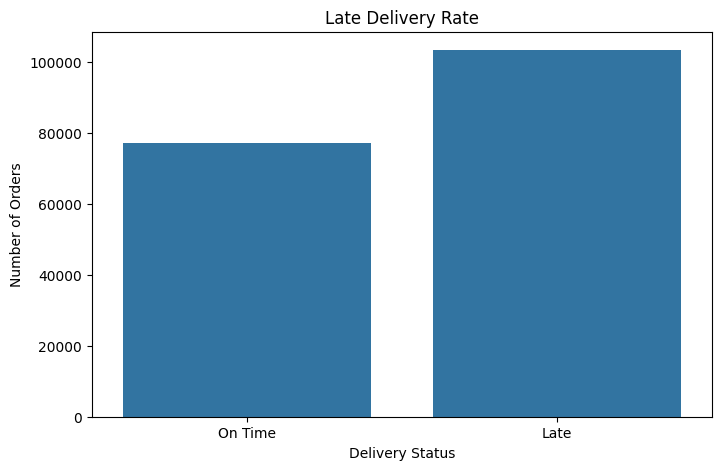

Overall, 57.28% of the orders were delivered late.


In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='is_late', data=df)
plt.title('Late Delivery Rate')
plt.xticks([0, 1], ['On Time', 'Late'])
plt.xlabel('Delivery Status')
plt.ylabel('Number of Orders')
plt.show()

print(f"Overall, {late_orders_rate:.2%} of the orders were delivered late.")

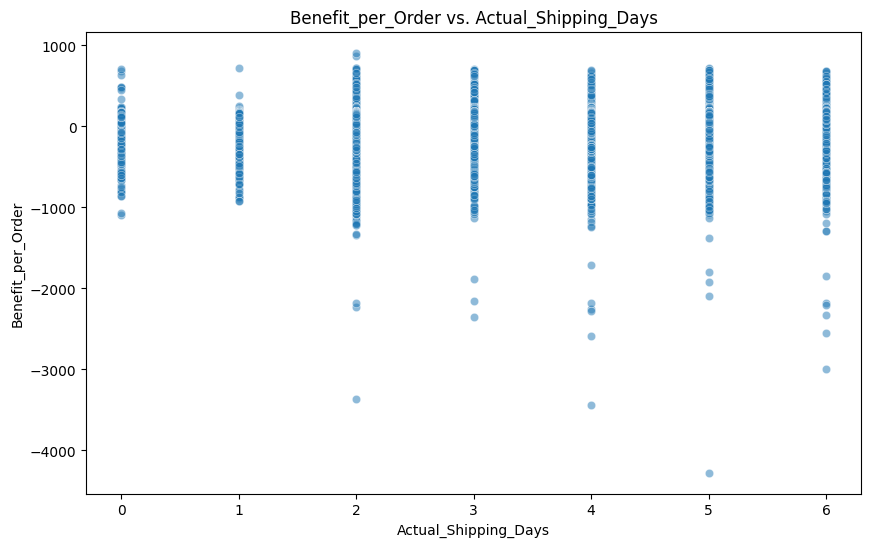

In [ ]:
#Mối quan hệ giữa thời gian giao hàng và lợi nhuận
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Days_for_shipping_(real)', y='Benefit_per_order', data=df, alpha=0.5)
plt.title('Benefit_per_Order vs. Actual_Shipping_Days')
plt.xlabel('Actual_Shipping_Days')
plt.ylabel('Benefit_per_Order')
plt.show()

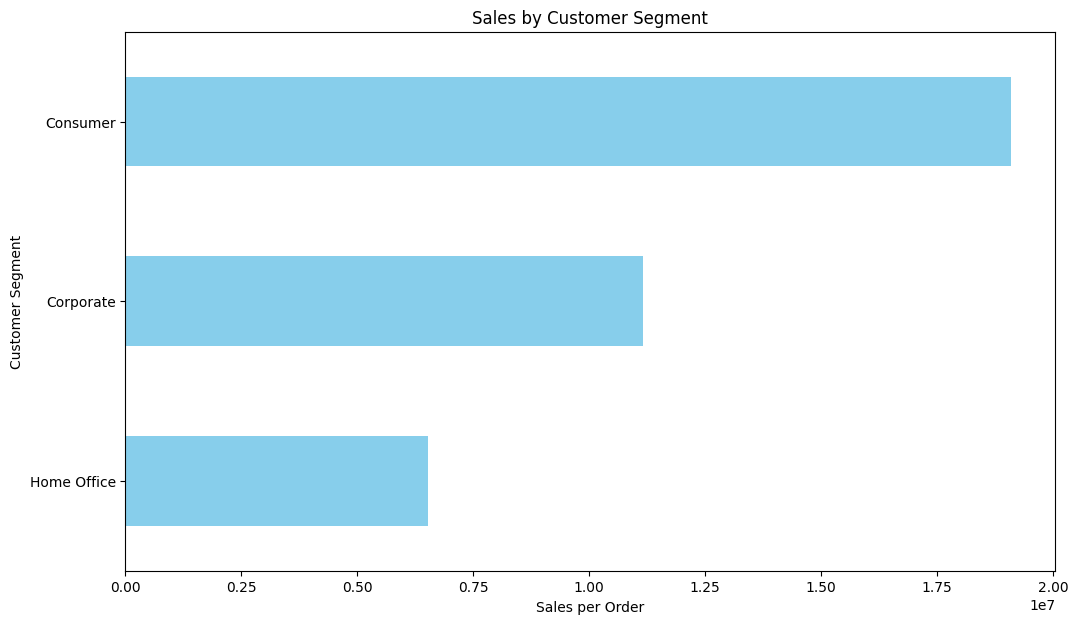

In [ ]:
# Tính lợi nhuận trung bình trên mỗi đơn hàng theo phân khúc khách hàng
segment_profit = df.groupby('Customer_Segment')['Sales'].sum().sort_values()

# Trực quan hóa lợi nhuận trên mỗi đơn hàng theo phân khúc khách hàng
plt.figure(figsize=(12, 7))
segment_profit.plot(kind='barh', color='skyblue')
plt.title('Sales by Customer Segment')
plt.xlabel('Sales per Order')
plt.ylabel('Customer Segment')
plt.show()

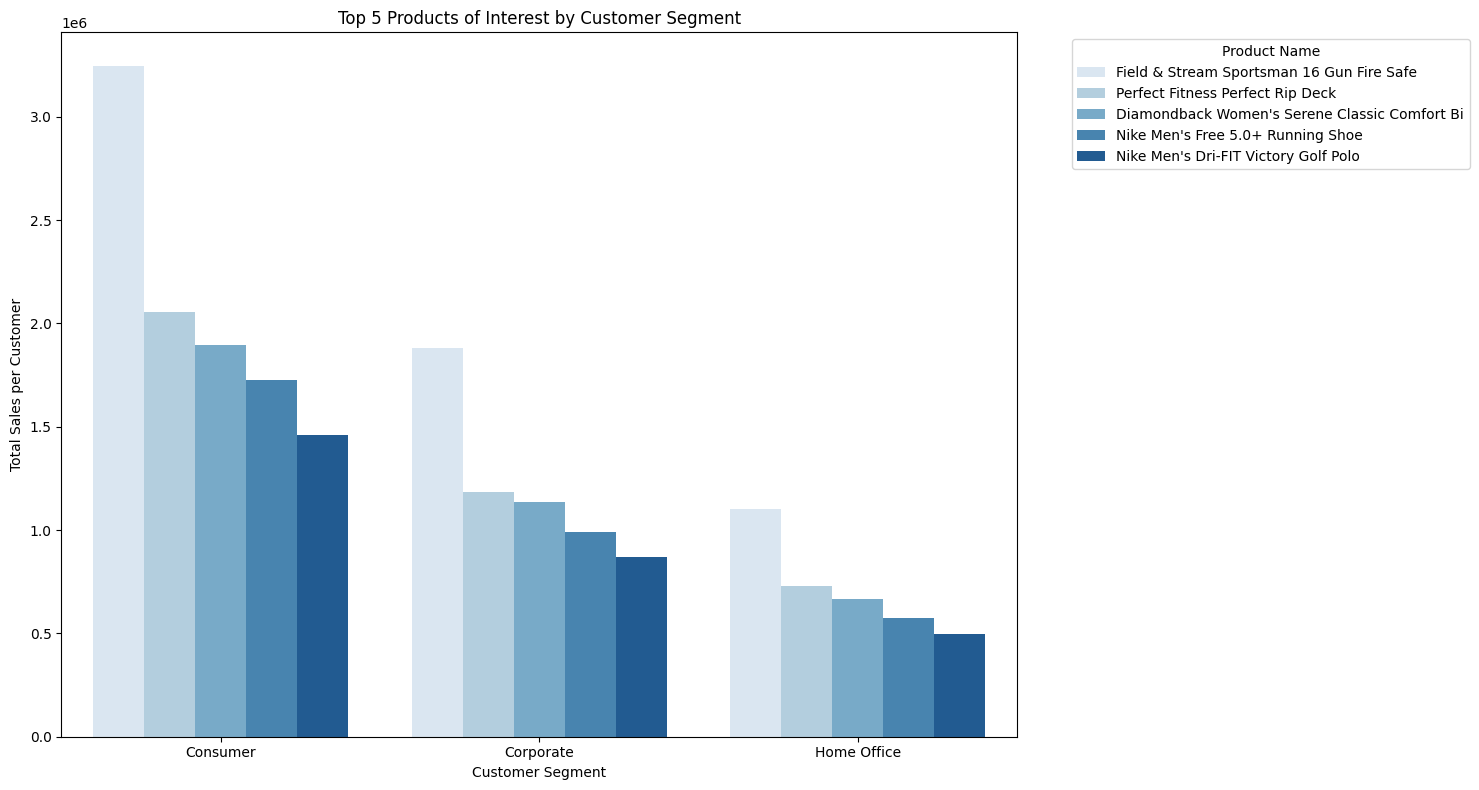

In [ ]:
# Nhóm dữ liệu theo 'Customer Segment' và 'Product Name', sau đó tính tổng 'Sales per customer'
product_interest = df.groupby(['Customer_Segment', 'Product_Name'])['Sales_per_customer'].sum().reset_index()

# Sắp xếp dữ liệu để lấy top sản phẩm trong mỗi phân khúc khách hàng
product_interest.sort_values(by=['Customer_Segment', 'Sales_per_customer'], ascending=[True, False], inplace=True)

# Giả sử chúng ta muốn xem top 5 sản phẩm được quan tâm nhất trong mỗi phân khúc
top_products_by_segment = product_interest.groupby('Customer_Segment').head(5)

# Trực quan hóa kết quả
plt.figure(figsize=(15, 8))
sns.barplot(x='Customer_Segment', y='Sales_per_customer', hue='Product_Name', data=top_products_by_segment, palette='Blues')
plt.title('Top 5 Products of Interest by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales per Customer')
plt.legend(title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend out of the plot
plt.tight_layout()
plt.show()

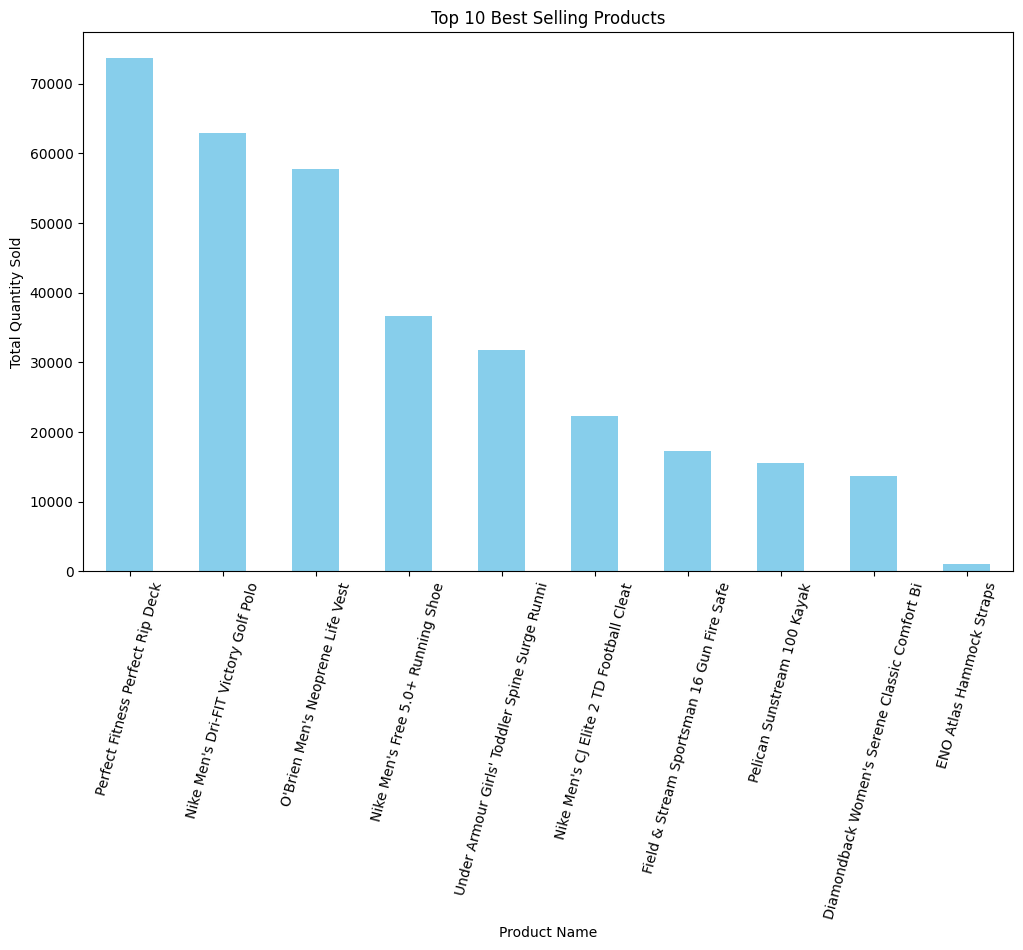

In [ ]:
# Tìm ra 10 sản phẩm bán chạy nhất
top_products = df.groupby('Product_Name')['Order_Item_Quantity'].sum().nlargest(10)

# Trực quan hóa top 10 sản phẩm bán chạy nhất
plt.figure(figsize=(12, 7))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Best Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=75)
plt.show()

<ipython-input-23-39dc8bb65813>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_profitable_products.index, y=top_profitable_products.values, palette='viridis')


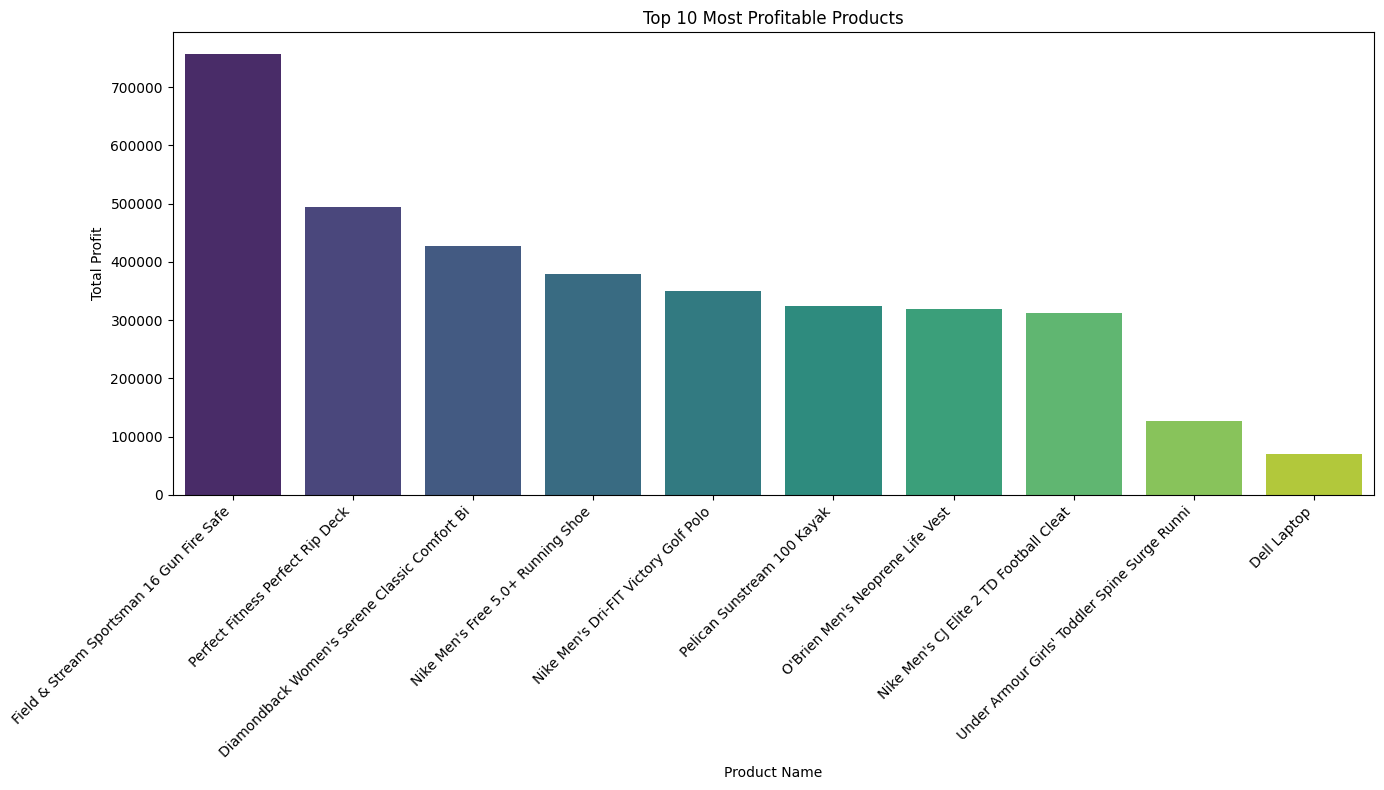

In [ ]:
# Tính toán tổng lợi nhuận cho mỗi sản phẩm
product_profits = df.groupby('Product_Name')['Order_Profit_Per_Order'].sum().sort_values(ascending=False)

# Xác định top 10 sản phẩm mang lại lợi nhuận cao nhất
top_profitable_products = product_profits.head(10)

# Trực quan hóa top 10 sản phẩm mang lại lợi nhuận cao nhất
plt.figure(figsize=(14, 8))
sns.barplot(x=top_profitable_products.index, y=top_profitable_products.values, palette='viridis')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Product Name')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

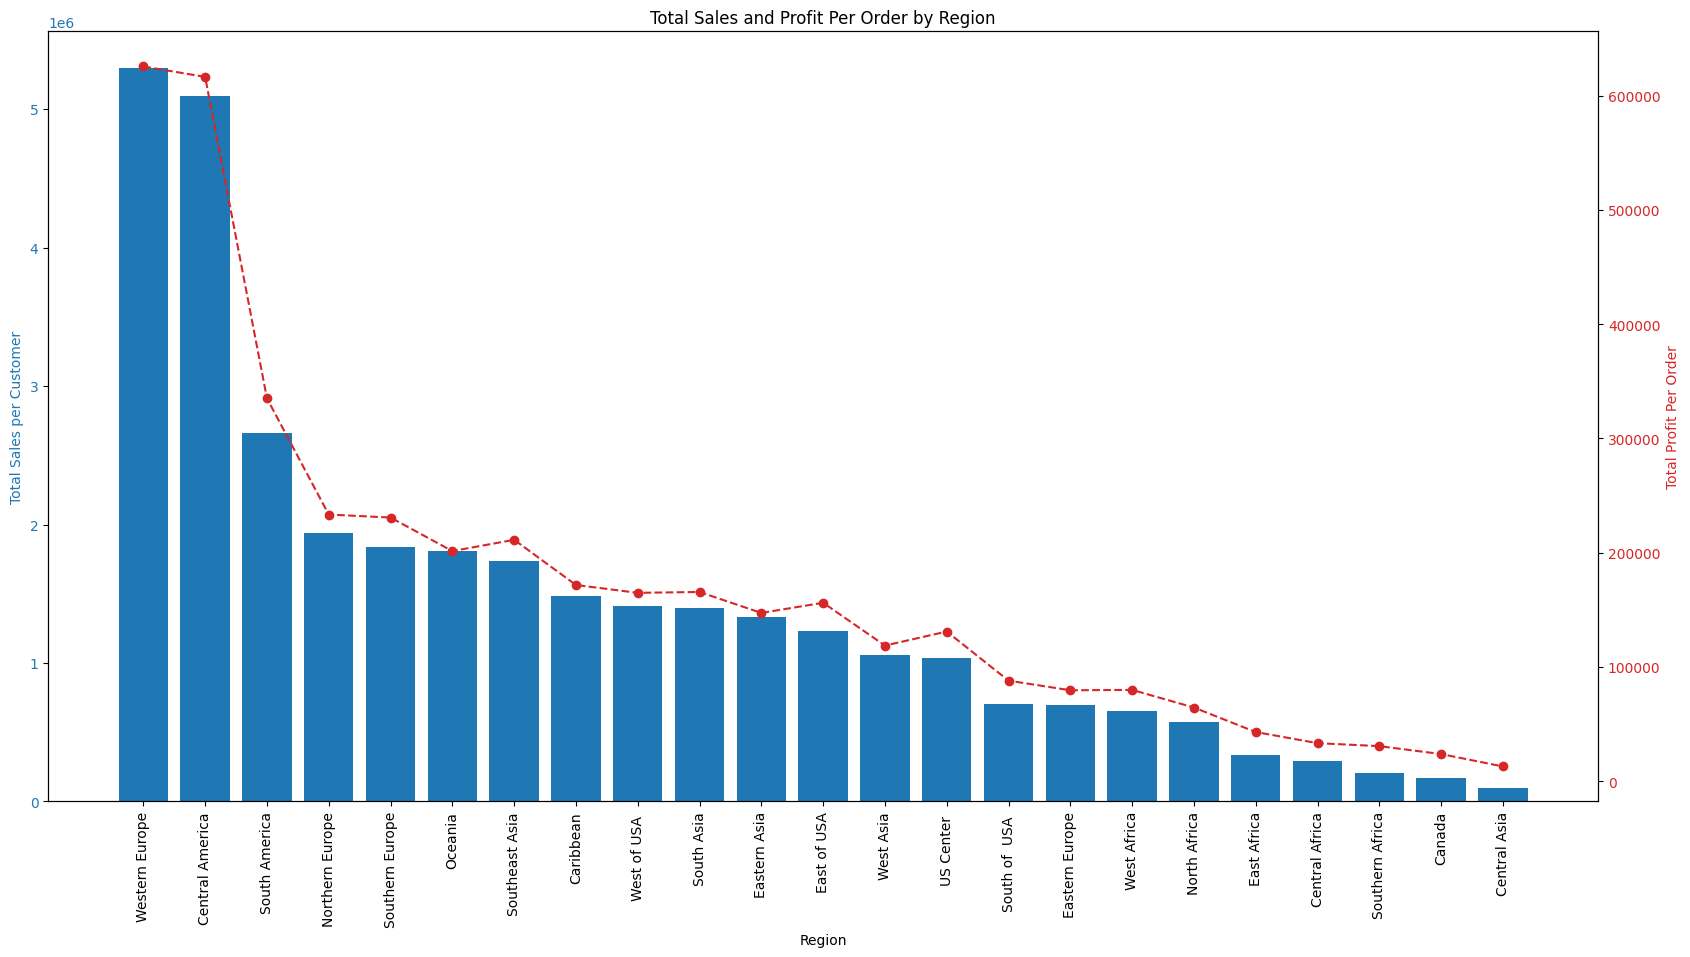

In [ ]:
# Tính toán doanh số và lợi nhuận theo khu vực (Order Region)
region_data = df.groupby('Order_Region').agg({
    'Sales_per_customer': 'sum',
    'Order_Profit_Per_Order': 'sum'
}).sort_values(by='Sales_per_customer', ascending=False)

# Chuẩn bị dữ liệu cho biểu đồ
region_data = region_data.reset_index()
regions = region_data['Order_Region']
sales = region_data['Sales_per_customer']
profits = region_data['Order_Profit_Per_Order']

# Tạo biểu đồ với 2 trục y để hiển thị cả doanh số và lợi nhuận
fig, ax1 = plt.subplots(figsize=(20, 10))

# Biểu đồ cột cho doanh số
color = 'tab:blue'
ax1.set_xlabel('Region')
ax1.set_ylabel('Total Sales per Customer', color=color)
ax1.bar(regions, sales, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelrotation=90)  # Xoay nhãn trục x

# Tạo một trục y thứ hai để hiển thị lợi nhuận
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Profit Per Order', color=color)
ax2.plot(regions, profits, color=color, marker='o', linestyle='dashed')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Total Sales and Profit Per Order by Region')
plt.show()

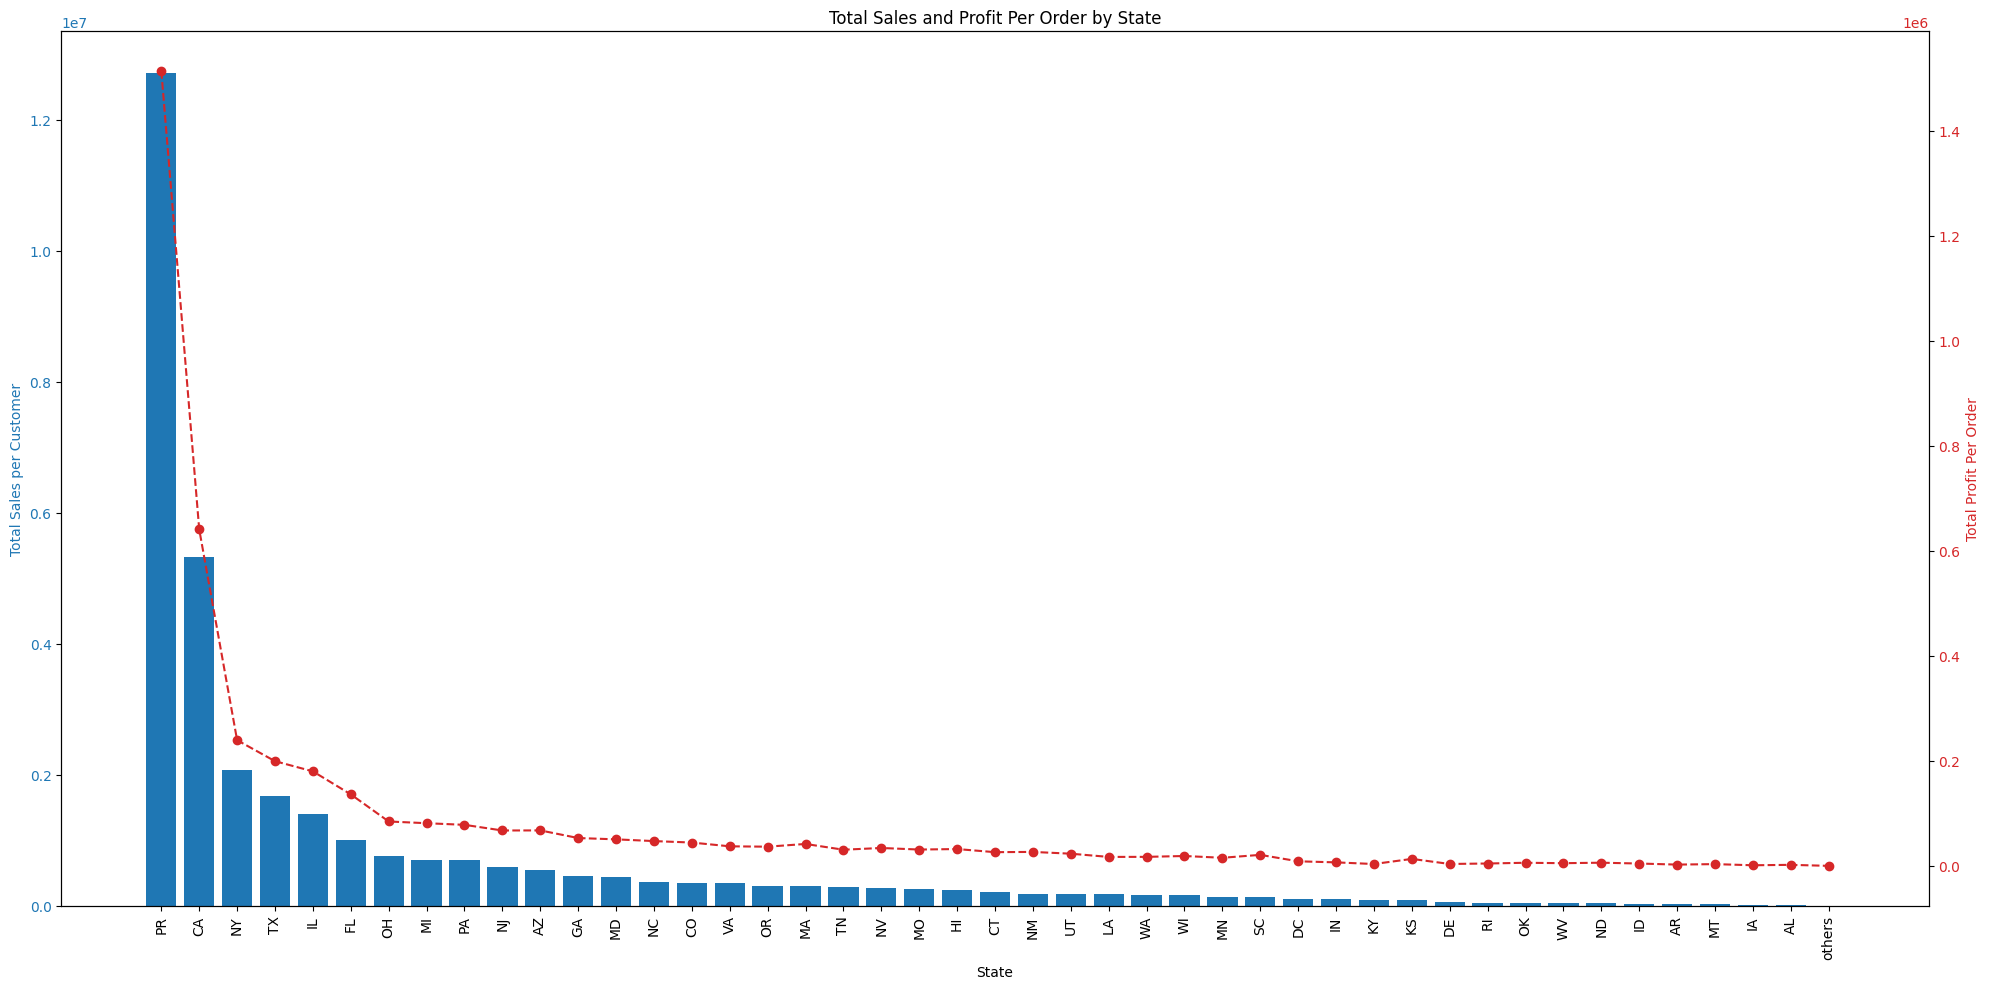

In [ ]:
# Tính toán doanh số và lợi nhuận theo bang (Customer State)
state_data = df.groupby('Customer_State').agg({
    'Sales_per_customer': 'sum',
    'Order_Profit_Per_Order': 'sum'
}).sort_values(by='Sales_per_customer', ascending=False)

# Reset index để dễ dàng trực quan hóa
state_data = state_data.reset_index()

# Tạo biểu đồ với 2 trục y để hiển thị cả doanh số và lợi nhuận
fig, ax1 = plt.subplots(figsize=(20, 10))

# Biểu đồ cột cho doanh số
color = 'tab:blue'
ax1.set_xlabel('State')
ax1.set_ylabel('Total Sales per Customer', color=color)
ax1.bar(state_data['Customer_State'], state_data['Sales_per_customer'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelrotation=90)

# Tạo một trục y thứ hai để hiển thị lợi nhuận
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Profit Per Order', color=color)
ax2.plot(state_data['Customer_State'], state_data['Order_Profit_Per_Order'], color=color, marker='o', linestyle='dashed')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Total Sales and Profit Per Order by State')
plt.tight_layout()
plt.show()

# **RFM**
Group by customer_id và customer_segment (tránh TH phân bổ kh đều)/ Thêm cột customer_segment để xét

In [ ]:
# Chuyển đổi cột 'order date (DateOrders)' sang datetime
df['order_date_(DateOrders)'] = pd.to_datetime(df['order_date_(DateOrders)'])
# Xác định ngày gần nhất trong dataset để tính Recency
assumed_current_date = df['order_date_(DateOrders)'].max() + pd.Timedelta(days=1)
assumed_current_date

Timestamp('2018-02-01 23:38:00')

In [ ]:
# Tính toán RFM metrics cho mỗi khách hàng
rfm = df.groupby('Order_Customer_Id').agg({
    'order_date_(DateOrders)': lambda x: (assumed_current_date - x.max()).days,  # Recency
    'Order_Id': 'nunique',  # Frequency
    'Sales_per_customer': 'sum'  # Monetary
}).reset_index()
rfm

,Order_Customer_Id,order_date_(DateOrders),Order_Id,Sales_per_customer
0,1,793,1,472.450012
1,2,137,4,1618.660042
2,3,230,5,3189.200037
3,4,381,4,1480.709993
4,5,458,3,1101.919998
...,...,...,...,...
20647,20753,1,1,161.869995
20648,20754,1,1,172.660004
20649,20755,1,1,314.640015
20650,20756,1,1,10.910000


In [ ]:
rfm.rename(columns={
    'order_date_(DateOrders)': 'R',
    'Order_Id': 'F',
    'Sales_per_customer': 'M'
}, inplace=True)
rfm

,Order_Customer_Id,Re,F,M
0,1,793,1,472.450012
1,2,137,4,1618.660042
2,3,230,5,3189.200037
3,4,381,4,1480.709993
4,5,458,3,1101.919998
...,...,...,...,...
20647,20753,1,1,161.869995
20648,20754,1,1,172.660004
20649,20755,1,1,314.640015
20650,20756,1,1,10.910000


In [ ]:
rfm.rename(columns={
    'Re': 'R'
}, inplace=True)
rfm

,Order_Customer_Id,R,F,M
0,1,793,1,472.450012
1,2,137,4,1618.660042
2,3,230,5,3189.200037
3,4,381,4,1480.709993
4,5,458,3,1101.919998
...,...,...,...,...
20647,20753,1,1,161.869995
20648,20754,1,1,172.660004
20649,20755,1,1,314.640015
20650,20756,1,1,10.910000


In [ ]:
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

In [ ]:
rfm['R_Score'] = pd.qcut(rfm['R'], 4, labels=r_labels, duplicates='drop')
rfm['F_Score'] = pd.qcut(rfm['F'].rank(method='first'), 4, labels=f_labels, duplicates='drop')
rfm['M_Score'] = pd.qcut(rfm['M'], 4, labels=m_labels, duplicates='drop')

In [ ]:
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)
rfm

,Order_Customer_Id,R,F,M,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
0,1,793,1,472.450012,1,1,2,112,4
1,2,137,4,1618.660042,3,3,3,333,9
2,3,230,5,3189.200037,2,3,4,234,9
3,4,381,4,1480.709993,1,3,3,133,7
4,5,458,3,1101.919998,1,2,2,122,5
...,...,...,...,...,...,...,...,...,...
20647,20753,1,1,161.869995,4,2,1,421,7
20648,20754,1,1,172.660004,4,2,1,421,7
20649,20755,1,1,314.640015,4,2,2,422,8
20650,20756,1,1,10.910000,4,2,1,421,7
